In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression


# Load data

In [2]:
df=pd.read_csv('advertising.csv')

In [3]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


# Exploratory data analysis

In [4]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [5]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

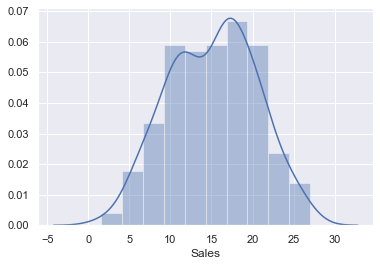

In [6]:
sns.distplot(df['Sales'])

its almost normally disributed

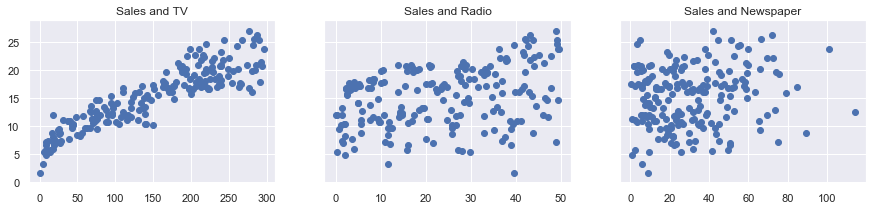

In [12]:
f,(ax1,ax2,ax3)=plt.subplots(1,3, sharey=True,figsize=(15,3))
ax1.scatter(df['TV'],df['Sales'])
ax1.set_title('Sales and TV')
ax2.scatter(df['Radio'],df['Sales'])
ax2.set_title('Sales and Radio')
ax3.scatter(df['Newspaper'],df['Sales'])
ax3.set_title('Sales and Newspaper')
plt.show()

# Creating model

In [14]:
x=df[['TV','Radio','Newspaper']]
y=df['Sales']

scale inputs

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler=StandardScaler()

In [19]:
scaler.fit(x)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [20]:
x_scaled=scaler.transform(x)

feature selection through standardization

In [23]:
reg=LinearRegression()

In [24]:
reg.fit(x_scaled,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
reg.coef_

array([4.66270025, 1.58465027, 0.00729187])

In [26]:
reg.intercept_

15.130500000000001

# R_sqaure

In [27]:
reg.score(x_scaled,y)

0.9025912899684558

# Adjusted_r2

In [30]:
def adj(x,y):
    r2=reg.score(x,y)
    n=x.shape[0]
    p=x.shape[1]
    adjusted_r2=1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [31]:
adj(x_scaled,y)

0.9011003403251159

so,here we can see r2 is slightly better than adjusted_r2 its because some of predictor has less significance

# F_selection

In [32]:
from sklearn.feature_selection import f_regression

In [34]:
f_regression(x_scaled,y)

(array([856.17671282,  27.57467815,   5.0667947 ]),
 array([7.92791163e-74, 3.88289236e-07, 2.54874443e-02]))

In [35]:
p_values=f_regression(x_scaled,y)[1]

In [37]:
p_values

array([7.92791163e-74, 3.88289236e-07, 2.54874443e-02])

summary table

In [39]:
reg_summary=pd.DataFrame(data=x.columns.values,columns=['features'])
reg_summary['coefficients']=reg.coef_
reg_summary['p_values']=p_values.round(3)

In [40]:
reg_summary

,features,coefficients,p_values
0,TV,4.662700,0.000
1,Radio,1.584650,0.000
2,Newspaper,0.007292,0.025


here p values in newspaper is large as compare to tv and newspaper but its not big to drop fro prediction
pvalues<0.05

# train_test_split

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [58]:
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [59]:
yhat=reg.predict(x_train)

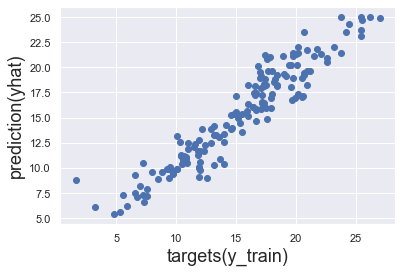

In [71]:
plt.scatter(y_train,yhat)
plt.xlabel('targets(y_train)',size=18)
plt.ylabel('prediction(yhat)',size=18)
plt.show()

Text(0.5, 1.0, 'residual pdf')

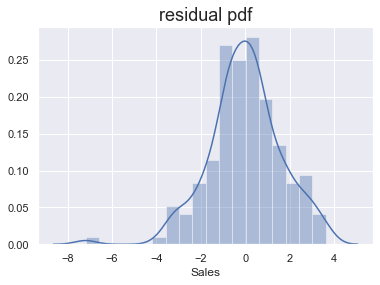

In [63]:
sns.distplot(y_train - yhat)
plt.title("residual pdf",size=18)

calculate r2

In [89]:
r2=reg.score(x_train,y_train)

here our model shows 90% variabilty

In [65]:
yhat_test=reg.predict(x_test)

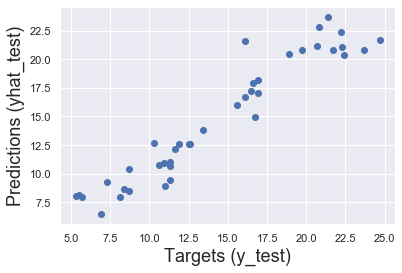

In [74]:
plt.scatter(y_test, yhat_test)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (yhat_test)',size=18)
plt.show()

In [75]:
# Finally, let's manually check these predictions
# To obtain the actual prices, we take the exponential of the log_price
df_pf = pd.DataFrame(yhat_test, columns=['Prediction'])
df_pf.head()

,Prediction
0,17.034772
1,20.409740
2,23.723989
3,9.272785
4,21.682719


In [76]:
df_pf['Target']=y_test

In [77]:
df_pf

,Prediction,Target
0,17.034772,NaN
1,20.409740,NaN
2,23.723989,NaN
3,9.272785,NaN
4,21.682719,NaN
5,12.569402,NaN
6,21.081195,NaN
7,8.690350,NaN
8,17.237013,NaN
9,16.666575,15.6


In [78]:
# Note that we have a lot of missing values
# There is no reason to have ANY missing values, though
# This suggests that something is wrong with the data frame / indexing

In [79]:
# After displaying y_test, we find what the issue is
# The old indexes are preserved (recall earlier in that code we made a note on that
# Therefore, to get a proper result, we must reset the index and drop the old indexing
y_test = y_test.reset_index(drop=True)

# Check the result
y_test.head()

0    16.9
1    22.4
2    21.4
3     7.3
4    24.7
Name: Sales, dtype: float64

In [81]:
df_pf['Target']=y_test

In [82]:
df_pf

,Prediction,Target
0,17.034772,16.9
1,20.409740,22.4
2,23.723989,21.4
3,9.272785,7.3
4,21.682719,24.7
5,12.569402,12.6
6,21.081195,22.3
7,8.690350,8.4
8,17.237013,16.5
9,16.666575,16.1


# MODEL EVALUTION

In [83]:
from sklearn.metrics import mean_squared_error

In [84]:
mse=mean_squared_error(yhat_test,y_test)

In [85]:
mse

2.907756910271092

# Root mean square error

In [86]:
rmse=np.sqrt(mse)

In [87]:
rmse

1.705214622934923

In [91]:
print('R_sqaure:',r2)
print('Root mean square error:',rmse)

R_sqaure: 0.9001416005862131
Root mean square error: 1.705214622934923


so here can see our model variabilty is 90%(r_square is close to 1(0.900)) which is good and rmse is also good which is 1.7 close to our prediction
